In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# About Dataset

Moore's law is a term used to refer to the observation made by Gordon Moore in 1965 that the number of transistors in a dense integrated circuit (IC) doubles about every two years/

This dataset contains information on the number of transistors in the circuit from 1971 to 2018

In [4]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving moore.csv to moore (1).csv


In [5]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

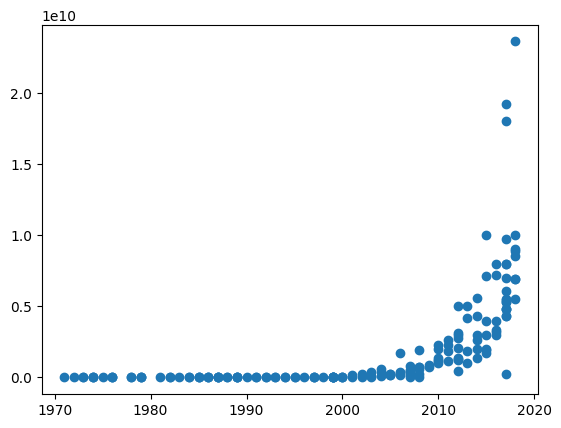

In [7]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

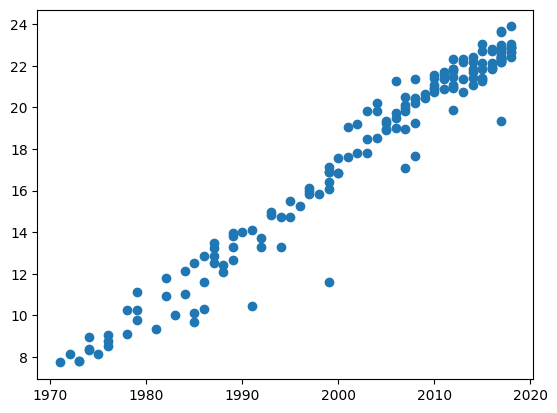

In [8]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [9]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [10]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

In [11]:
# Complie the model 
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

In [12]:
# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 465.6795 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 316.3435 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 267.8766 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 253.2423 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 311.9005 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 185.8581 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 151.6052 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 94.5404 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 49.8309 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 58.5762 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 

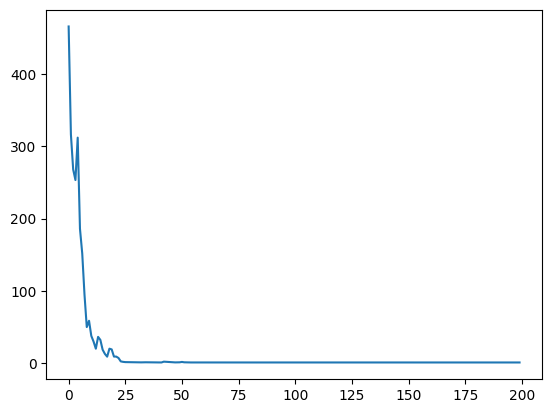

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [14]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.34422308]], dtype=float32), array([17.763676], dtype=float32)]


In [15]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [16]:
print("Time to double:", np.log(2) / a)

Time to double: 2.013656889016772


In [17]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


# Making Predictions

6/6 [==============================] - 0s 2ms/step


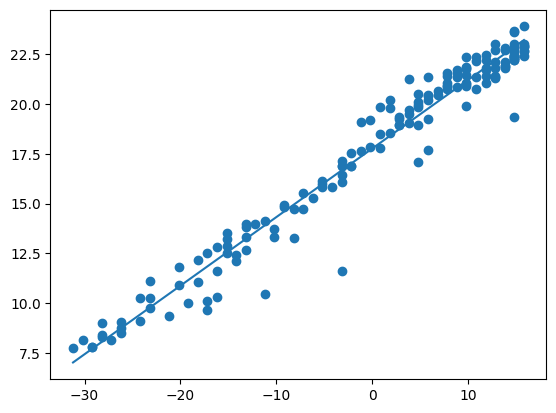

In [18]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [19]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# we don't use == for floating points
np.allclose(Yhat, Yhat2)

True

In [20]:
# save the model to a file
model.save('linear_regression.h5')

In [21]:
# load the model and confirm that it still works
model = tf.keras.models.load_model('linear_regression.h5')
print(model.layers)

6/6 [==============================] - 0s 2ms/step


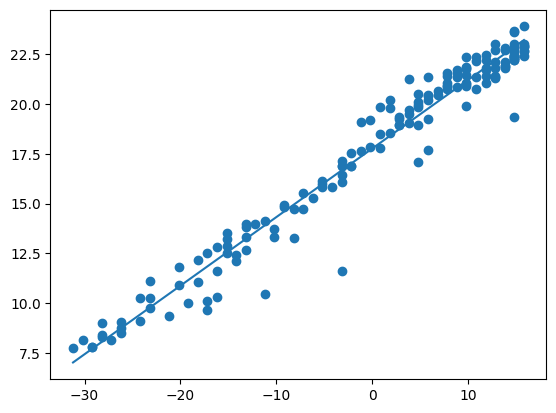

In [22]:
# verifying the model performance
y_hat = model.predict(X).flatten()

# make sure line fits our data
plt.scatter(X, Y)
plt.plot(X, y_hat);